In [9]:
!pip install -r requirements.txt

  Using cached cycler-0.11.0-py3-none-any.whl.metadata (785 bytes)
  Using cached fonttools-4.29.1-py3-none-any.whl.metadata (119 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached kiwisolver-1.3.2.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.5.1.tar.gz (35.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-1.22.2.zip (11.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached packaging-21.3-py3-none-any.whl.metadata (15 kB)
  Using cached pandas-1.4.1.tar.gz (4.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Pillow-9.0.1.tar.gz (49.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached pyparsing-3.0.7-py3-none-any.wh

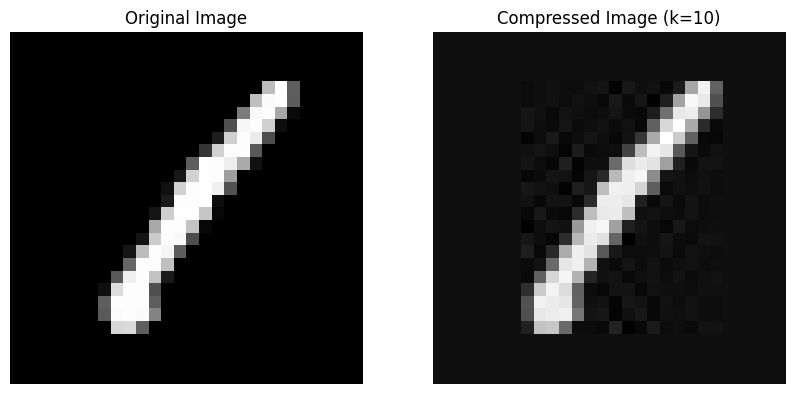

Compression Ratio: 1.38
Analysis: SVD compressed the digit image effectively, retaining key features with fewer components.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Load data
data = pd.read_csv('/content/train.csv')
image = data.drop('label', axis=1).iloc[0].values.reshape(28, 28)  # First image

# Normalize image
image = image / 255.0

# Apply SVD
U, S, VT = np.linalg.svd(image, full_matrices=False)

# Reconstruct with k=10 singular values
k = 10
S_k = np.zeros_like(S)
S_k[:k] = S[:k]
image_compressed = np.dot(U[:, :k] * S_k[:k], VT[:k, :])

# Visualize original vs compressed
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_compressed, cmap='gray')
plt.title(f'Compressed Image (k={k})')
plt.axis('off')
plt.savefig('svd_compression.png')
plt.show()

# Compute compression ratio
original_size = image.size
compressed_size = U[:, :k].size + S_k[:k].size + VT[:k, :].size
print(f'Compression Ratio: {original_size / compressed_size:.2f}')
print('Analysis: SVD compressed the digit image effectively, retaining key features with fewer components.')